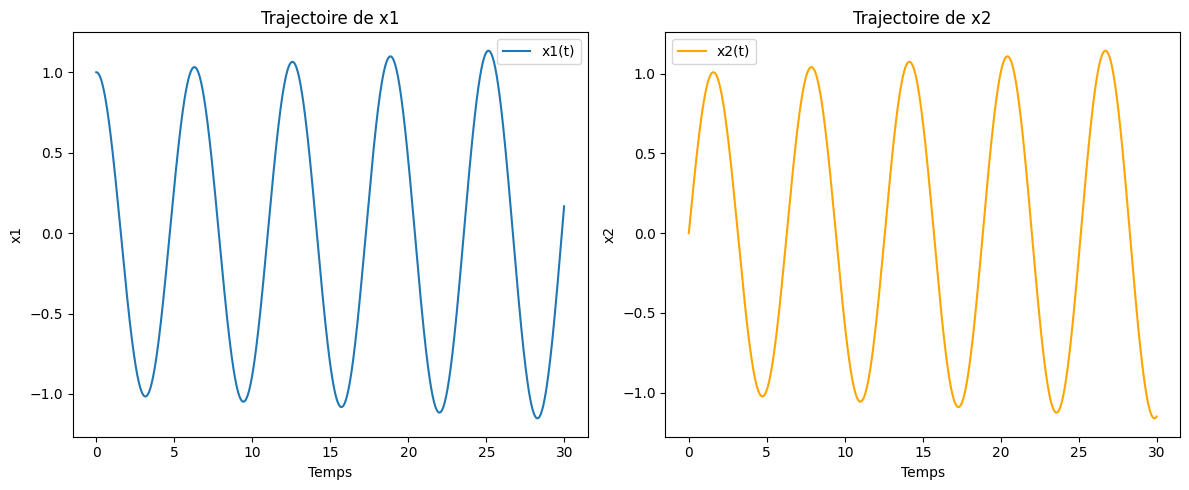

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de l'oscillateur harmonique
k = 1.0  # Constante de raideur (peut être ajustée)
dt = 0.01  # Intervalle de temps
N = 1000* 3  # Nombre de pas de temps
initial_state = np.array([1.0, 0.0])  # État initial [x1, x2]
tf = N * dt
# Matrice d'évolution
A = np.array([[0, -k],
              [k, 0]]) * dt + np.eye(2)

# Initialiser les listes pour stocker les trajectoires
x1_values = np.zeros(N)
x2_values = np.zeros(N)
state_values =[]
# État initial
state = initial_state

# Simulation de l'évolution
for i in range(N):
    x1_values[i] = state[0]
    x2_values[i] = state[1]
    state_values.append(state)
    # Mettre à jour l'état
    state = A @ state
state_values = np.array(state_values)
# Création des sous-graphes
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Trace la trajectoire de x1
ax[0].plot(np.arange(N) * dt, x1_values, label='x1(t)')
ax[0].set_title('Trajectoire de x1')
ax[0].set_xlabel('Temps')
ax[0].set_ylabel('x1')
ax[0].legend()

# Trace la trajectoire de x2
ax[1].plot(np.arange(N) * dt, x2_values, label='x2(t)', color='orange')
ax[1].set_title('Trajectoire de x2')
ax[1].set_xlabel('Temps')
ax[1].set_ylabel('x2')
ax[1].legend()

# Afficher les graphes
plt.tight_layout()
plt.show()


## Kalman

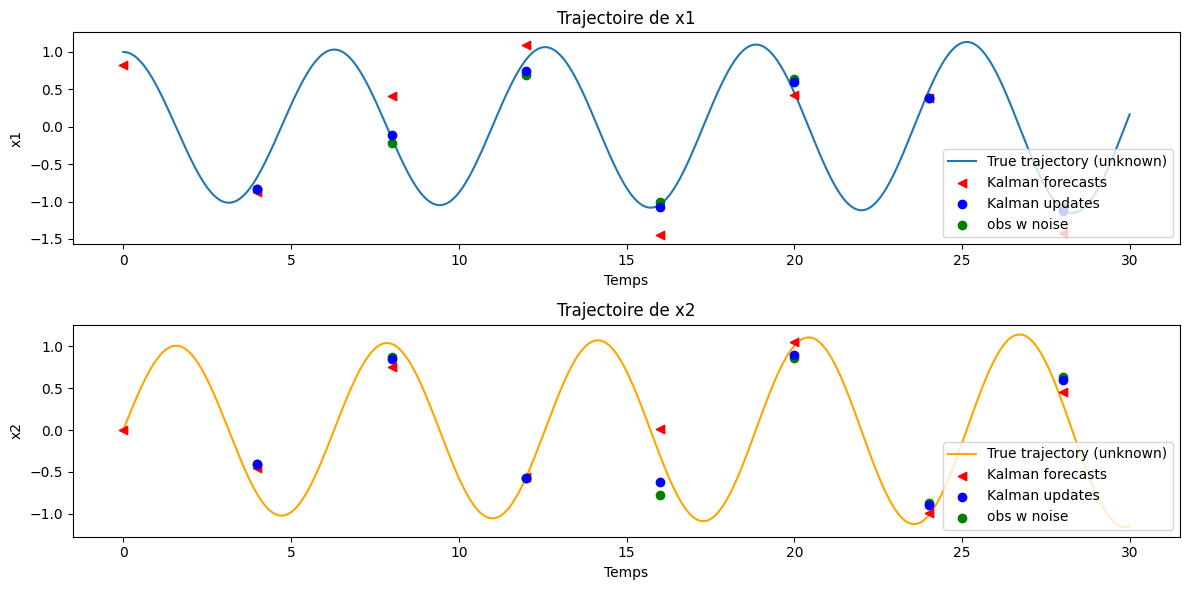

In [163]:
timestep_kalman = 4
def generate_noise(matrix):
    return np.random.multivariate_normal(np.zeros(len(matrix)), matrix)
initial_uncertainty_matrix = np.diag([0.1, 0.]) 
P = initial_uncertainty_matrix
intial_noise = generate_noise(initial_uncertainty_matrix)

R = np.diag([0.1, 0.1]) * 0.3
H = np.diag([1, 1]) 

Q = np.diag(np.ones(2)) * .1

n_timesteps = int(timestep_kalman/dt)
F = np.linalg.matrix_power(A, n_timesteps) + np.random.uniform(-1,1, (2,2)) * .5 # adding biases in the model
t = 0
t_kalmans = [t]
n_steps_kalman = int(tf / timestep_kalman) + 1
xhat = initial_state + intial_noise
xhat_w_cor = initial_state + intial_noise
xhats = [xhat]
xhats_w_cor = []
obs_hist = []

for i in range(n_steps_kalman- 1):
    xhat = F @ xhat_w_cor
    xhat_w_cor = xhat
    xhats.append(xhat)
    
    P = F @ P @ F.T + Q
    
    #obs = state_values[()]
    obs_index = int((i + 1) * timestep_kalman / dt) - 1
    obs = state_values[obs_index]
    obs_w_noise = obs + generate_noise(R)
    obs_hist.append(obs_w_noise)
    K = P @ H.T @ np.linalg.inv(H @P @H.T + R)
    xhat_w_cor = xhat_w_cor + K @ (obs_w_noise - H @ xhat_w_cor)
    P = (np.eye(2) -  K @ H) @P
    xhat = xhat_w_cor
    xhats_w_cor.append(xhat_w_cor)
    
    
xhats = np.array(xhats)
obs_hist = np.array(obs_hist)
xhats_w_cor = np.array(xhats_w_cor)

fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Trace la trajectoire de x1
ax[0].plot(np.arange(N) * dt, x1_values, label='True trajectory (unknown)')
ax[0].scatter(np.arange(n_steps_kalman) * timestep_kalman, xhats[:, 0], c='r', label='Kalman forecasts', zorder=3, marker="<");
ax[0].scatter(np.arange(1, n_steps_kalman) * timestep_kalman, xhats_w_cor[:, 0], c='b', label='Kalman updates', zorder=5);
ax[0].scatter(np.arange(1, n_steps_kalman) * timestep_kalman, obs_hist[:, 0], c='g', label='obs w noise', zorder=3);
ax[0].set_title('Trajectoire de x1')
ax[0].set_xlabel('Temps')
ax[0].set_ylabel('x1')
ax[0].legend(loc='lower right')

# Trace la trajectoire de x2
ax[1].plot(np.arange(N) * dt, x2_values, color='orange', label='True trajectory (unknown)')
ax[1].scatter(np.arange(n_steps_kalman) * timestep_kalman, xhats[:, 1], c='r', label='Kalman forecasts', zorder=3, marker="<");
ax[1].scatter(np.arange(1, n_steps_kalman) * timestep_kalman, xhats_w_cor[:, 1], c='b', label='Kalman updates', zorder=5);
ax[1].scatter(np.arange(1, n_steps_kalman) * timestep_kalman, obs_hist[:, 1], c='g', label='obs w noise', zorder=3);
ax[1].set_title('Trajectoire de x2')
ax[1].set_xlabel('Temps')
ax[1].set_ylabel('x2')
ax[1].legend(loc='lower right')

# Afficher les graphes
fig.tight_layout()
